## Dependencies

In [1]:
import os
import pandas as pd
import librosa as lr
import librosa.feature as lrf
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

## Loading Data and Preprocessing

In [2]:
# Import the feature CSV
data = pd.read_csv("dataset_gtzan_raw.csv") # Raw file doesn't include feature variances

# Encode the genre labels
data['Genre'] = LabelEncoder().fit_transform(data['Genre'])
Y = data[['Genre']]

# Preprocessing
pca = PCA()
pca.fit(data)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

pca = PCA(n_components=25,whiten=True)
pca = pca.fit(data)
dataPCA = pd.DataFrame(pca.transform(data))
X = dataPCA

# Splitting
x_train, x_test, y_train,y_test= train_test_split(X, Y, test_size=0.2, random_state = 0)

display_labels = ["bl", "cl", "co", "di", "hi", "ja", "me", "po", "re", "ro"]

## Model Trainings and Calculations

In [12]:
# There are 3 models used in the paper. Gaussian Classifier (Naive Bayes)
# Gaussian Mixture Model and K-NN. Each model is trained in order.
# Additional models are trained for performance comparison.

# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_score = '%f' % nb.score(x_test, y_test) # Float formatting
nb_cm = confusion_matrix(y_test, nb.predict(x_test))

# GMM
gmm = GaussianMixture(n_components = 10)
gmm.fit(x_train)
gmm_score = gmm.score(x_test, y_test) # Score is in log-likelihood.
# Can't take exponents to evaluate results since the distributions are not uniform.
gmm_cm = confusion_matrix(y_test, gmm.predict(x_test))

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_score = '%f' % knn.score(x_test, y_test)
knn_cm = confusion_matrix(y_test, knn.predict(x_test))

# SVM
svm = SVC(C=100)
svm.fit(x_train, y_train)
svm_score = '%f' % svm.score(x_test, y_test)
svm_cm = confusion_matrix(y_test, svm.predict(x_test))

# MLP
clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)
mlp_score = '%f' % clf.score(x_test, y_test)
mlp_cm = confusion_matrix(y_test, clf.predict(x_test))

# Decision Tree
dtc = RandomForestClassifier()
dtc.fit(x_train, y_train)
dtc_score = '%f' % dtc.score(x_test, y_test)
dtc_cm = confusion_matrix(y_test, dtc.predict(x_test))

## Model Scores

In [4]:
# Naive Bayes
print("Naive Bayes score: ", nb_score)

# GMM
print("Gaussian Mixture Model score in log likelihood: ", gmm_score)

# K-NN
print("K-Nearest Neighbor score: ", knn_score)

# SVM
print("Support Vector Machine score: ", svm_score)

# MLP
print("Multilayer-Perceptron score: ", mlp_score)

# DTC
print("Decision Tree score: ", dtc_score)

Naive Bayes score:  0.800000
Gaussian Mixture Model score in log likelihood:  -36.48513120670742
K-Nearest Neighbor score:  0.735000
Support Vector Machine score:  0.900000
Multilayer-Perceptron score:  0.875000
Decision Tree score:  0.850000


## Confusion Matrices

Naive Bayes Matrix


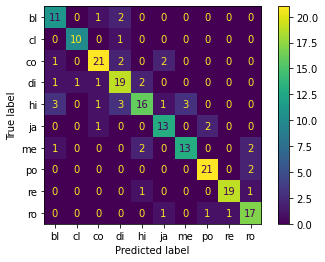

In [13]:
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm,
                               display_labels=display_labels)

gmm_disp = ConfusionMatrixDisplay(confusion_matrix=gmm_cm,
                               display_labels=display_labels)

knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm,
                               display_labels=display_labels)

svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm,
                               display_labels=display_labels)

mlp_disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm,
                               display_labels=display_labels)

dtc_disp = ConfusionMatrixDisplay(confusion_matrix=dtc_cm,
                               display_labels=display_labels)

print("Naive Bayes Matrix")
nb_disp.plot()

GMM Matrix


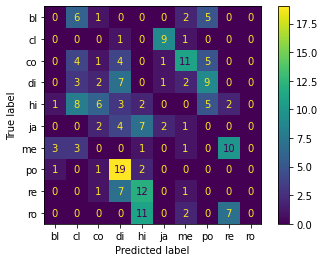

In [14]:
print("GMM Matrix")
gmm_disp.plot()

K-NN Matrix


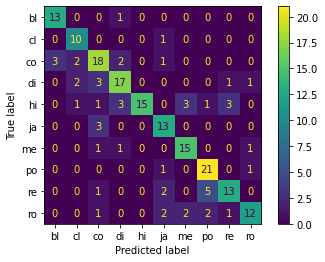

In [6]:
print("K-NN Matrix")
knn_disp.plot()

SVM Matrix


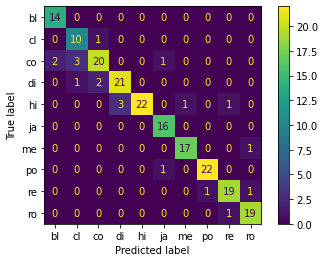

In [7]:
print("SVM Matrix")
svm_disp.plot()

MLP Matrix


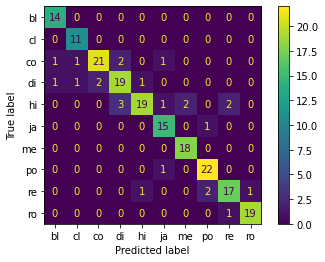

In [8]:
print("MLP Matrix")
mlp_disp.plot()

Decision Tree Matrix


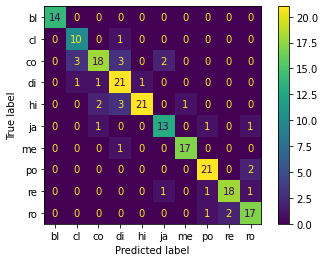

In [9]:
print("Decision Tree Matrix")
dtc_disp.plot()

## Model Performance Evaluations

In [10]:
model_list = ["Gaussian Classifier", 
             "K-Nearest Neighbor", "Support Vector Machine",
             "Multilayer-Perceptron", "Decision Tree"]
model_scores = [nb_score, knn_score, svm_score, mlp_score, dtc_score]
model_comparison = pd.DataFrame(model_scores, model_list)
model_comparison.columns = ["Accuracy"]

In [11]:
print(model_comparison)

                        Accuracy
Gaussian Classifier     0.800000
K-Nearest Neighbor      0.735000
Support Vector Machine  0.900000
Multilayer-Perceptron   0.875000
Decision Tree           0.850000
